---
# **Project** : **Holistic Landmarks Detection on image and video**
---
### ---> **Sahil Kumar 777**

This project performs pose, face and hands landmarks detection in real time using mediapipe framework. The output can be can be used in various applications like to identify key body locations, analyze posture, and categorize movements.

* **Objective :-**Detect face, hands and pose landmarks at same time
* **Modules :-** openCV, Mediapipe


## Install Important Libraries

In [2]:
pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 46.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 19.7 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydf 0.12.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 4.25.8 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have n

## Functions to visualize results

### Generete and Save Video from ImageList

In [1]:
# Convert To Video

import cv2
import mediapipe as mp

def visualize_video(filename,images) :
  """ Function to generate video from list of images.
      Args:
          filename
          images
      Return :
          It returns filename """

  imagesList = [image for image in images]

  # Define the codec and create a VideoWriter object
  fourcc = cv2.VideoWriter_fourcc(*'VP80')  # Can use other codecs like 'mp4v' (for .mp4 files) but mp4 converted files are not supported by coalb and browsers
  fps = 30  # Frames per second
  height, width, _ = imagesList[0].shape

  # Open VideoWriter
  video_writer =  cv2.VideoWriter(filename, fourcc, fps, (width, height))

  # Display gestures and hand landmarks.
  for image in imagesList:
    annotated_image = image.copy()
    video_writer.write(annotated_image)
  video_writer.release() # Closes VideoWriter
  return filename

### Function to Play Video In Colab

In [2]:
from IPython.display import HTML
from base64 import b64encode

def play_video_in_colab(filepath) :

  with open(filepath,'rb') as file :
    mp4 = file.read()
    data_url = "data:video/"+ filepath.split('.')[-1] +";base64,"  + b64encode(mp4).decode()

  return HTML("""
    <video src="%s" type="video/webm" width="640" height="480" controls autoplay>
    </video>
  """  % data_url)

## Image holistic landmarks detection


Nose coordinates: (134.44540083408356, 60.07031720876694)


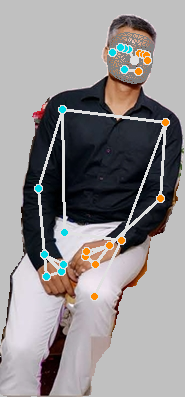

In [3]:
import cv2
import numpy as np
import mediapipe as mp
from google.colab.patches import cv2_imshow

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic

BG_COLOR = (192, 192, 192) # gray

with mp_holistic.Holistic(
    static_image_mode=True,
    model_complexity=2,
    enable_segmentation=True,
    refine_face_landmarks=True) as holistic:

  image = cv2.imread("Sahil_pose.jpeg")
  image_height, image_width, _ = image.shape
  # Convert the BGR image to RGB before processing.
  results = holistic.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

  if results.pose_landmarks:
    print(
        f'Nose coordinates: ('
        f'{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.NOSE].x * image_width}, '
        f'{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.NOSE].y * image_height})'
    )

  annotated_image = image.copy()
  # Draw segmentation on the image.
  # To improve segmentation around boundaries, consider applying a joint
  # bilateral filter to "results.segmentation_mask" with "image".
  condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1
  bg_image = np.zeros(image.shape, dtype=np.uint8)
  bg_image[:] = BG_COLOR
  annotated_image = np.where(condition, annotated_image, bg_image)

  # Draw pose, left and right hands, and face landmarks on the image.
  mp_drawing.draw_landmarks(
      annotated_image,
      results.face_landmarks,
      mp_holistic.FACEMESH_TESSELATION,
      landmark_drawing_spec=None,
      connection_drawing_spec=mp_drawing_styles
      .get_default_face_mesh_tesselation_style())

  mp_drawing.draw_landmarks(
      annotated_image,
      results.pose_landmarks,
      mp_holistic.POSE_CONNECTIONS,
      landmark_drawing_spec=mp_drawing_styles.
      get_default_pose_landmarks_style())


  # cv2.imwrite('/tmp/annotated_image' + str(idx) + '.png', annotated_image)

  # # Plot pose world landmarks.
  # mp_drawing.plot_landmarks(
  #     results.pose_world_landmarks, mp_holistic.POSE_CONNECTIONS)
  cv2_imshow(annotated_image)

## Video holistic detection


In [ ]:
import cv2
import numpy as np
import mediapipe as mp
from google.colab.patches import cv2_imshow

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic

In [5]:
### H/olistic Landmarks Detection
images=[]

# STEP 1: Initialize the detector
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

  # STEP 2: Intialize the video capturing into frames
  cap = cv2.VideoCapture('newRun.mp4')
  i=0

  while cap.isOpened():

    # STEP 3: Read the frames one by one
    success,image = cap.read();

    if not success :
      if i==0:
        print('Empty frame')
      else :
        print('Detection Completed')
        print('Total Frames : ',i)
      break
    if i == 301 :
      break


    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = holistic.process(image)

    # Draw landmark annotation on the image.
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    mp_drawing.draw_landmarks(
        image,
        results.face_landmarks,
        mp_holistic.FACEMESH_CONTOURS,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp_drawing_styles
        .get_default_face_mesh_contours_style())

    mp_drawing.draw_landmarks(
        image,
        results.pose_landmarks,
        mp_holistic.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles
        .get_default_pose_landmarks_style())

    mp_drawing.draw_landmarks(
        image,
        results.left_hand_landmarks,
        mp_holistic.HAND_CONNECTIONS,
        mp_drawing_styles.get_default_hand_landmarks_style(),
        mp_drawing_styles.get_default_hand_connections_style())

    mp_drawing.draw_landmarks(
        image,
        results.right_hand_landmarks,
        mp_holistic.HAND_CONNECTIONS,
        mp_drawing_styles.get_default_hand_landmarks_style(),
        mp_drawing_styles.get_default_hand_connections_style())

    # STEP 5: Process the result. In this case, visualize it.
    images.append(image)
    print(i)
    i+=1

  cap.release()


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
Detection Completed
Total Frames :  203


In [6]:
visualize_video('OutputVideo1.webm',images)

'OutputVideo1.webm'

In [10]:
play_video_in_colab('OutputVideo1.webm')